# Required Capstone Component 13.1

## New Information:

Have discovered that PI is actually not used much in practice, because it fails to properly encapsulate the
magnitude of the improvement and difficult to tune eta. Rather use UCB or EI. 

source: https://www.robots.ox.ac.uk/~twgr/assets/teaching/lecture_16.pdf

Scaling the output by setting  `normalize_y=True` in `GaussianProcessRegressor()` is helpful for Bayesian Optimistation. Note that aquisition functions are affine-invariant: shifting and scaling won't effect where the argmax position is. So centering should not harm where BO chooses to sample, rather it usually helps the GP fit. 

In [2]:
# Import any necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C, Matern
from scipy.stats import norm
from statistics import mean
import itertools
import math


# load initial inputs
x_1 = np.load("initial_data/function_1/initial_inputs.npy")
x_2 = np.load("initial_data/function_2/initial_inputs.npy")
x_3 = np.load("initial_data/function_3/initial_inputs.npy")
x_4 = np.load("initial_data/function_4/initial_inputs.npy")
x_5 = np.load("initial_data/function_5/initial_inputs.npy")
x_6 = np.load("initial_data/function_6/initial_inputs.npy")
x_7 = np.load("initial_data/function_7/initial_inputs.npy")
x_8 = np.load("initial_data/function_8/initial_inputs.npy")

# load initial outputs
y_1 = np.load("initial_data/function_1/initial_outputs.npy")
y_2 = np.load("initial_data/function_2/initial_outputs.npy")
y_3 = np.load("initial_data/function_3/initial_outputs.npy")
y_4 = np.load("initial_data/function_4/initial_outputs.npy")
y_5 = np.load("initial_data/function_5/initial_outputs.npy")
y_6 = np.load("initial_data/function_6/initial_outputs.npy")
y_7 = np.load("initial_data/function_7/initial_outputs.npy")
y_8 = np.load("initial_data/function_8/initial_outputs.npy")


In [3]:
# carefully import new data

array = np.array  # need to make array available in local namespace

with open("new_data_points/week_13/inputs.txt", "r") as f:
    x_new = eval(f.read().strip())

with open("new_data_points/week_13/outputs.txt", "r") as f:
    y_new = eval(f.read().strip())


# check format:
print(x_new)
print(y_new)

print(type(x_new))
print(type(y_new))

print(x_new[2])
print(y_new[2])

[array([0.79798 , 0.767677]), array([0.060606, 0.848485]), array([0.171717, 0.      , 0.545455]), array([0.510204, 0.489796, 0.387755, 0.408163]), array([0.22449 , 0.836735, 0.877551, 0.877551]), array([0.517241, 0.413793, 0.275862, 0.827586, 0.241379]), array([0.      , 0.428571, 0.285714, 0.142857, 0.357143, 0.785714]), array([0.25, 0.25, 0.  , 0.25, 0.5 , 0.5 , 0.25, 0.5 ])]
[np.float64(5.257257418645051e-34), np.float64(-0.039106034006926964), np.float64(-0.08441161493157641), np.float64(-2.547194382465466), np.float64(1035.7874160380748), np.float64(-0.6533580553607632), np.float64(1.4051677477577844), np.float64(9.8333)]
<class 'list'>
<class 'list'>
[0.171717 0.       0.545455]
-0.08441161493157641


## Compare old values to new

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/1255269336.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_1, patch_artist=True, labels=['y_1'])


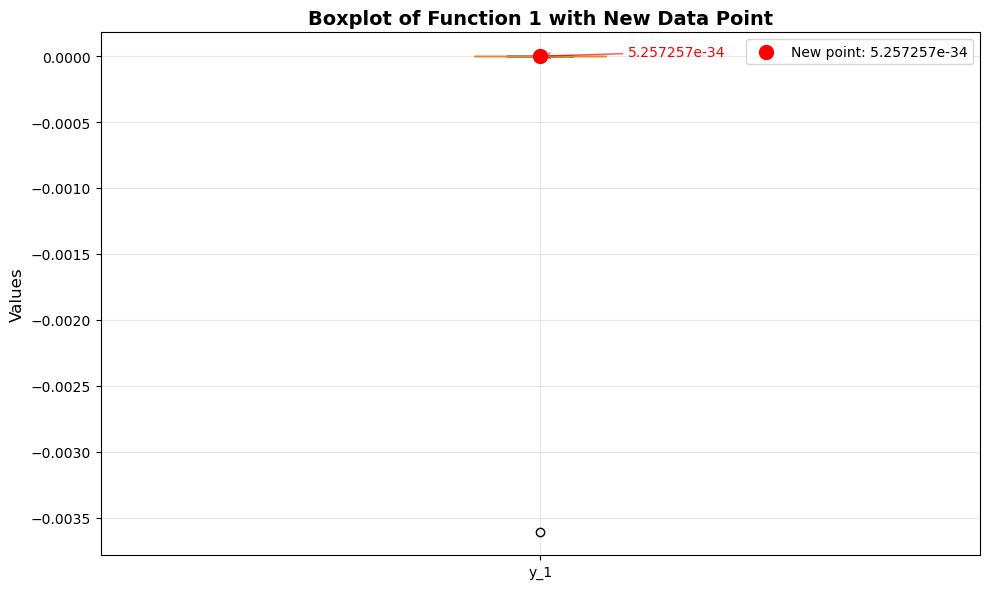

Old maximum: 7.710875e-16
New point: 5.257257e-34
Percentile rank in y_1: 90.0%

Old position: [0.73102363 0.73299988]
New position: [0.79798  0.767677]


In [4]:
# Create boxplot of y_1 with y_new[0] overlaid
plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_1, patch_artist=True, labels=['y_1'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point y_new[0] in red
new_value = float(y_new[0])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 1 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_1):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_1: {100 * (y_1 < new_value).sum() / len(y_1):.1f}%")
print(f"\nOld position: {x_1[np.argmax(y_1)]}")
print(f"New position: {x_new[0]}")

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/486927565.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_2, patch_artist=True, labels=['y_2'])


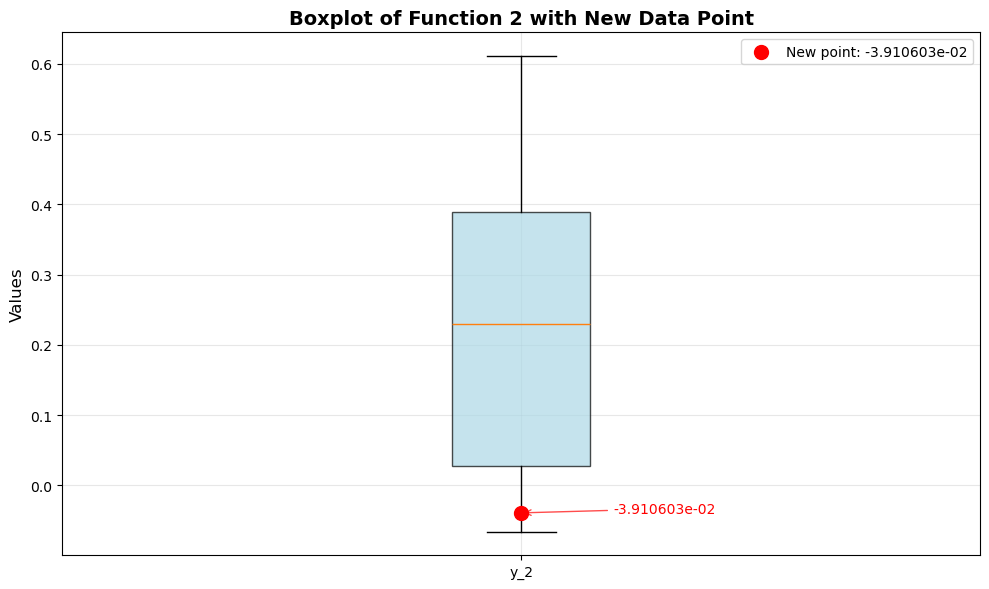

Old maximum: 6.112052e-01
New point: -3.910603e-02
Percentile rank in y_2: 10.0%

Old position: [0.70263656 0.9265642 ]
New position: [0.060606 0.848485]


In [5]:

plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_2, patch_artist=True, labels=['y_2'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point in red
new_value = float(y_new[1])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 2 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_2):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_2: {100 * (y_2 < new_value).sum() / len(y_2):.1f}%")
print(f"\nOld position: {x_2[np.argmax(y_2)]}")
print(f"New position: {x_new[1]}")


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/349341757.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_3, patch_artist=True, labels=['y_3'])


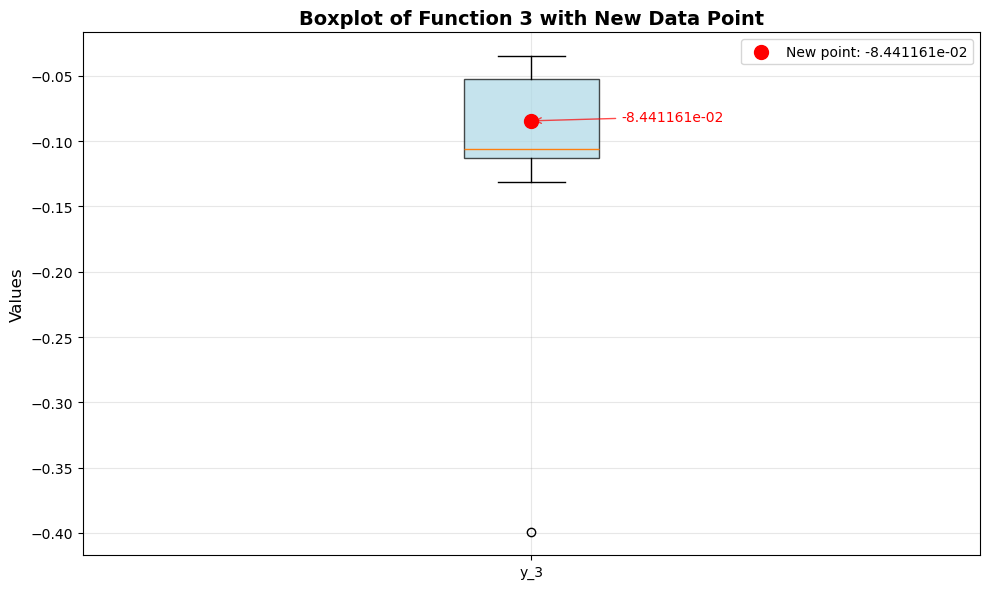

Old maximum: -3.483531e-02
New point: -8.441161e-02
Percentile rank in y_3: 66.7%

Old position: [0.49258141 0.61159319 0.34017639]
New position: [0.171717 0.       0.545455]


In [6]:
plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_3, patch_artist=True, labels=['y_3'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point in red
new_value = float(y_new[2])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 3 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_3):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_3: {100 * (y_3 < new_value).sum() / len(y_3):.1f}%")
print(f"\nOld position: {x_3[np.argmax(y_3)]}")
print(f"New position: {x_new[2]}")


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/1467443748.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_4, patch_artist=True, labels=['y_4'])


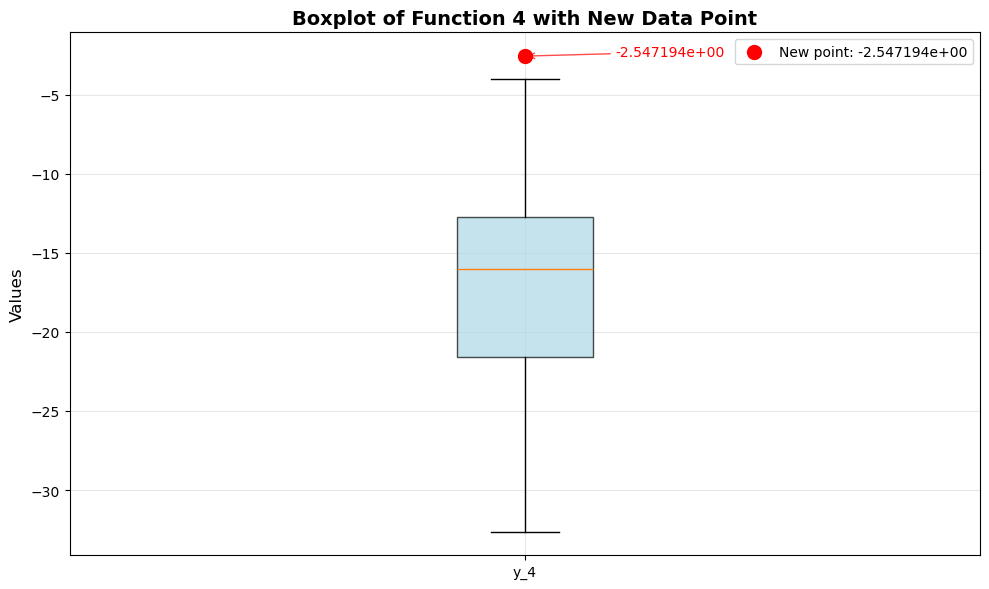

Old maximum: -4.025542e+00
New point: -2.547194e+00
Percentile rank in y_4: 100.0%

Old position: [0.57776561 0.42877174 0.42582587 0.24900741]
New position: [0.510204 0.489796 0.387755 0.408163]


In [7]:
plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_4, patch_artist=True, labels=['y_4'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point in red
new_value = float(y_new[3])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 4 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_4):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_4: {100 * (y_4 < new_value).sum() / len(y_4):.1f}%")
print(f"\nOld position: {x_4[np.argmax(y_4)]}")
print(f"New position: {x_new[3]}")


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/1127605965.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_5, patch_artist=True, labels=['y_5'])


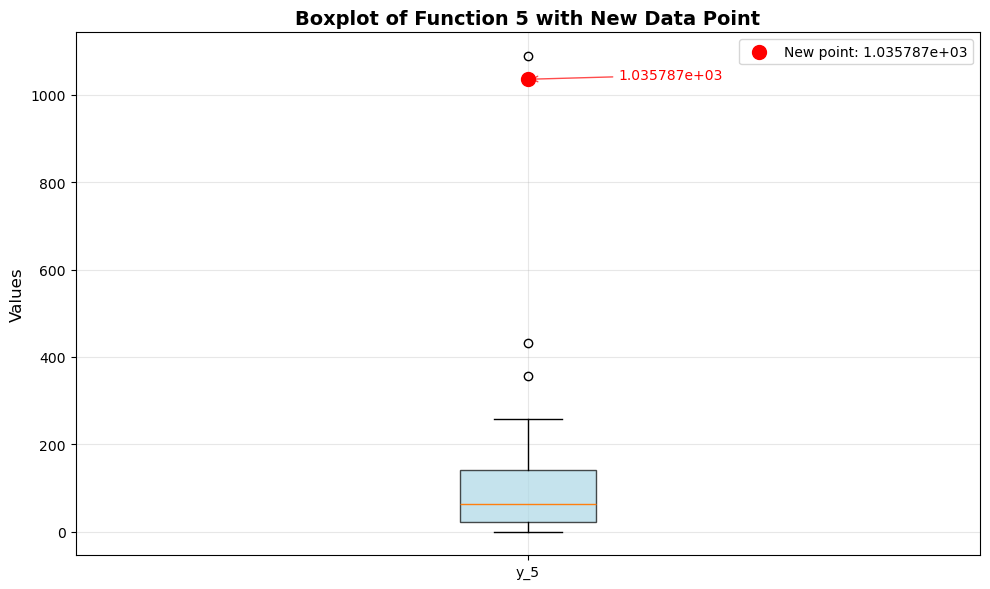

Old maximum: 1.088860e+03
New point: 1.035787e+03
Percentile rank in y_5: 95.0%

Old position: [0.22418902 0.84648049 0.87948418 0.87851568]
New position: [0.22449  0.836735 0.877551 0.877551]


In [8]:

plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_5, patch_artist=True, labels=['y_5'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point in red
new_value = float(y_new[4])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 5 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_5):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_5: {100 * (y_5 < new_value).sum() / len(y_5):.1f}%")
print(f"\nOld position: {x_5[np.argmax(y_5)]}")
print(f"New position: {x_new[4]}")

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/2666289375.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_6, patch_artist=True, labels=['y_6'])


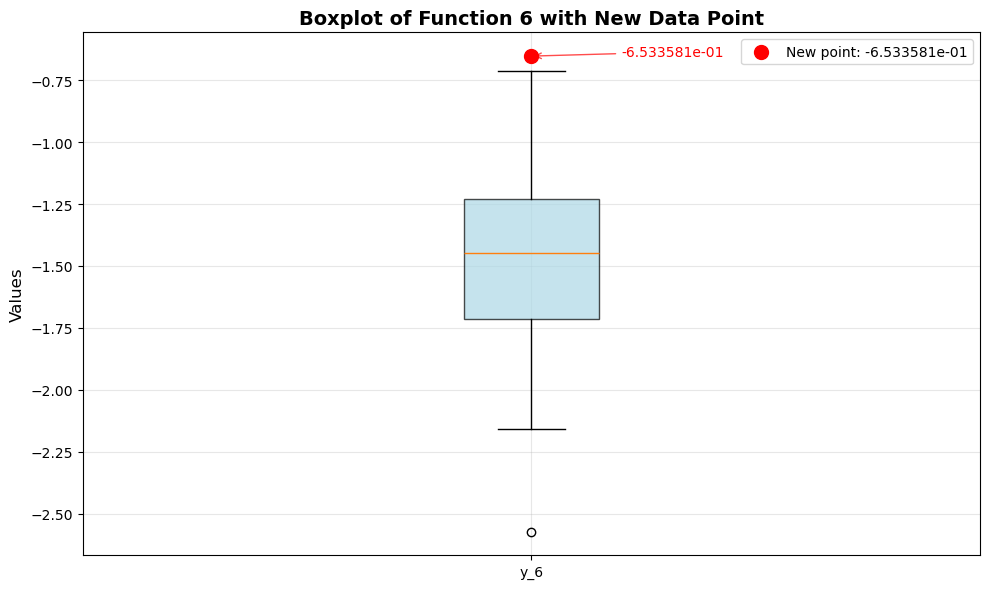

Old maximum: -7.142649e-01
New point: -6.533581e-01
Percentile rank in y_6: 100.0%

Old position: [0.7281861  0.15469257 0.73255167 0.69399651 0.05640131]
New position: [0.517241 0.413793 0.275862 0.827586 0.241379]


In [9]:

plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_6, patch_artist=True, labels=['y_6'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point in red
new_value = float(y_new[5])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 6 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_6):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_6: {100 * (y_6 < new_value).sum() / len(y_6):.1f}%")
print(f"\nOld position: {x_6[np.argmax(y_6)]}")
print(f"New position: {x_new[5]}")

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/2156351199.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_7, patch_artist=True, labels=['y_7'])


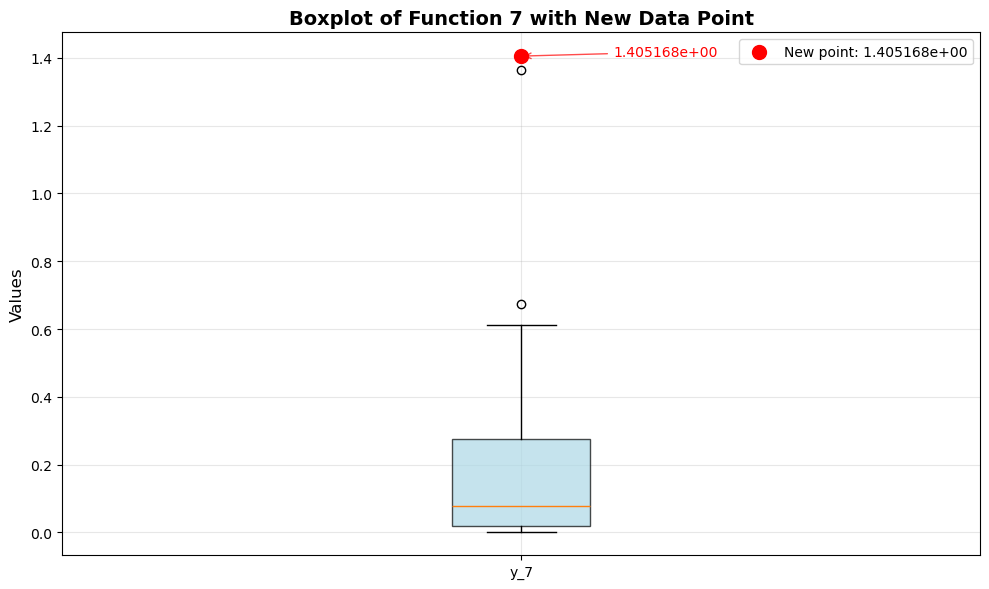

Old maximum: 1.364968e+00
New point: 1.405168e+00
Percentile rank in y_7: 100.0%

Old position: [0.05789554 0.49167222 0.24742222 0.21811844 0.42042833 0.73096984]
New position: [0.       0.428571 0.285714 0.142857 0.357143 0.785714]


In [10]:
plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_7, patch_artist=True, labels=['y_7'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point in red
new_value = float(y_new[6])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 7 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_7):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_7: {100 * (y_7 < new_value).sum() / len(y_7):.1f}%")
print(f"\nOld position: {x_7[np.argmax(y_7)]}")
print(f"New position: {x_new[6]}")

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_26054/1682089635.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(y_8, patch_artist=True, labels=['y_8'])


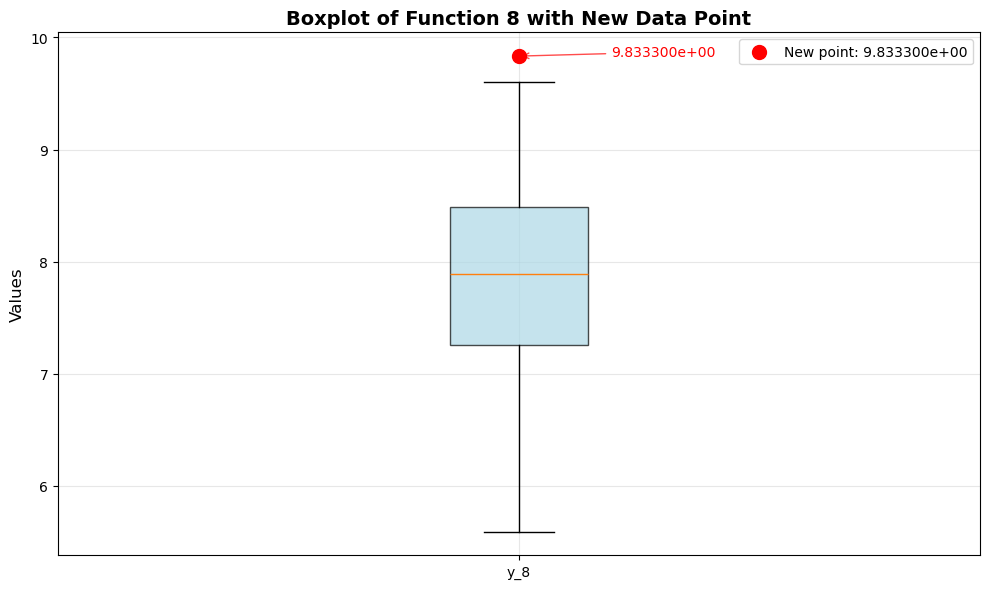

Old maximum: 9.598482e+00
New point: 9.833300e+00
Percentile rank in y_8: 100.0%

Old position: [0.05644741 0.06595555 0.02292868 0.03878647 0.40393544 0.80105533
 0.48830701 0.89308498]
New position: [0.25 0.25 0.   0.25 0.5  0.5  0.25 0.5 ]


In [11]:
plt.figure(figsize=(10, 6))

# Create the boxplot
box_plot = plt.boxplot(y_8, patch_artist=True, labels=['y_8'])

# Style the boxplot
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)

# Add the new point in red
new_value = float(y_new[7])  # Convert np.float64 to regular float
plt.scatter(1, new_value, color='red', s=100, zorder=5, label=f'New point: {new_value:.6e}')

# Add value label for the new point
plt.annotate(f'{new_value:.6e}', 
             xy=(1, new_value), 
             xytext=(1.1, new_value),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, 
             color='red',
             ha='left')

# Customize the plot
plt.title('Boxplot of Function 8 with New Data Point', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics for comparison
print(f"Old maximum: {np.max(y_8):.6e}")
print(f"New point: {new_value:.6e}")
print(f"Percentile rank in y_8: {100 * (y_8 < new_value).sum() / len(y_8):.1f}%")
print(f"\nOld position: {x_8[np.argmax(y_8)]}")
print(f"New position: {x_new[7]}")

## Add New Data to Old Data

In [12]:
x_1 = np.concatenate((x_1, x_new[0].reshape(1, -1)))
y_1 = np.concatenate((y_1, np.array([y_new[0]])))

x_2 = np.concatenate((x_2, x_new[1].reshape(1, -1)))
y_2 = np.concatenate((y_2, np.array([y_new[1]])))

x_3 = np.concatenate((x_3, x_new[2].reshape(1, -1)))
y_3 = np.concatenate((y_3, np.array([y_new[2]])))

x_4 = np.concatenate((x_4, x_new[3].reshape(1, -1)))
y_4 = np.concatenate((y_4, np.array([y_new[3]])))

x_5 = np.concatenate((x_5, x_new[4].reshape(1, -1)))
y_5 = np.concatenate((y_5, np.array([y_new[4]])))

x_6 = np.concatenate((x_6, x_new[5].reshape(1, -1)))
y_6 = np.concatenate((y_6, np.array([y_new[5]])))

x_7 = np.concatenate((x_7, x_new[6].reshape(1, -1)))
y_7 = np.concatenate((y_7, np.array([y_new[6]])))

x_8 = np.concatenate((x_8, x_new[7].reshape(1, -1)))
y_8 = np.concatenate((y_8, np.array([y_new[7]])))


In [13]:
print(x_1)
print(y_1)

[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]
 [0.79798    0.767677  ]]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048  5.25725742e-034]


# Find New Query Points

My plan is to leave my method the same for all functions for which I found a new maximum. For the two that were in the 90th percentile and above, I will adjust slightly. For the two that performed very badly, I will put a lot more effort into adjusting my method to hopefully improve performance. 

## Function 1:

**Change:** Normalised the outpu by setting `normalize_y=True` in `GaussianProcessRegressor()`. I then adjusted $\kappa$ in UCB accordingly. 

In [14]:
# Fit GP

# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.01
nu = 1.5

# set up evaluation grid:
x_11 = np.linspace(0, 1, 100)
x_12 = np.linspace(0, 1, 100)
x_11, x_12 = np.meshgrid(x_11, x_12)
x_1_grid = np.column_stack([x_11.ravel(), x_12.ravel()])

# Define and fit GP
kernel = Matern(length_scale = length_scale, nu = nu)
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True)
model.fit(np.array(x_1), np.array(y_1))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_1_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))


average posterior mean: -0.000327815232549245
average posterior standard deviation: 0.0010351033560784709


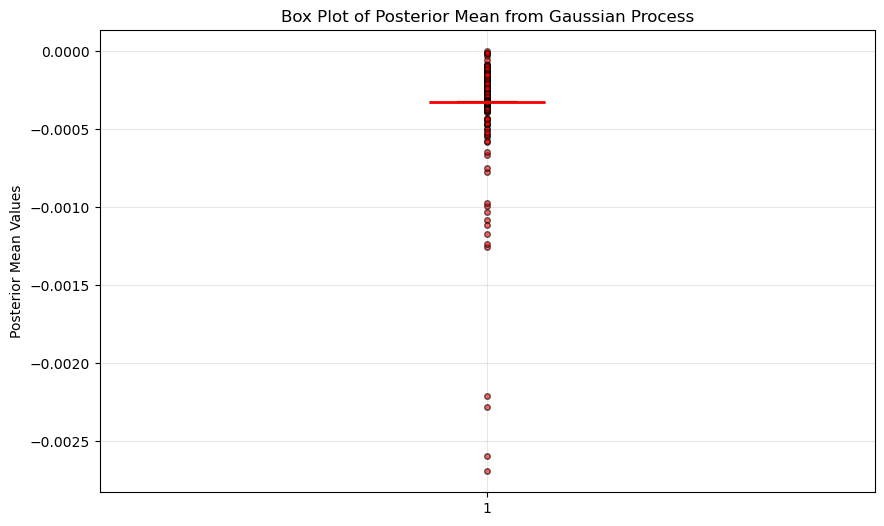

Posterior Mean Statistics:
Mean: -0.000327815232549245
Std: 5.1600866068693616e-05
Min: -0.002693182078163217
Max: -4.699777893246715e-14
Range: 0.002693182078116219


In [15]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


In [16]:
# Calculate acquisition function

# Calculate the UCB aquisition function
kappa =  0.1
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_1 = np.argmax(UCB)  
next_point_1 = x_1_grid[max_idx_1] 
print("Best known point:", x_1[np.argmax(y_1)])
print("Next query point:", round(next_point_1[0], 6), round(next_point_1[1], 6))

Best known point: [0.73102363 0.73299988]
Next query point: 0.313131 0.080808


## Function 2:

**Change:** Normalised the output by setting `normalize_y=True` in `GaussianProcessRegressor()`. I then adjusted $\kappa$ in UCB accordingly. 

In [17]:
# GP assumption
noise_assumption = 1e-3

# kernel parameters
length_scale = 0.1

# set up evaluation grid:
x_21 = np.linspace(0, 1, 100)
x_22 = np.linspace(0, 1, 100)
x_21, x_22 = np.meshgrid(x_21, x_22)
x_2_grid = np.column_stack([x_21.ravel(), x_22.ravel()])

# Define and fit GP
kernel = RBF(length_scale = length_scale) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True)
model.fit(np.array(x_2), np.array(y_2))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_2_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))



average posterior mean: 0.20528713075047755
average posterior standard deviation: 0.1690993527477973


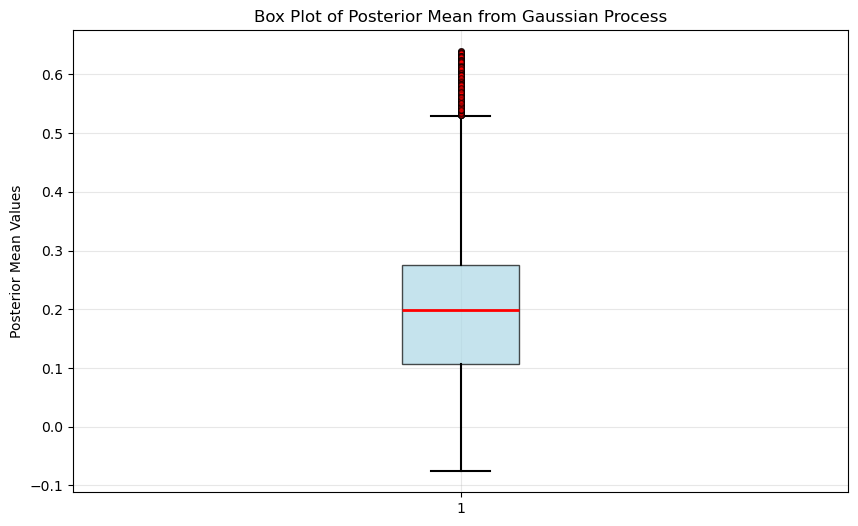

Posterior Mean Statistics:
Mean: 0.20528713075047758
Std: 0.14543721664967033
Min: -0.07600455413163826
Max: 0.6394406768395681
Range: 0.7154452309712063


In [18]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


In [19]:
# Calculate the UCB aquisition function
kappa =  1 # choose this by looking at the mean post_mean and post_std to get an idea of the scale of each
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_2 = np.argmax(UCB)  
next_point_2 = x_2_grid[max_idx_2] 
print("Best known point:", x_2[np.argmax(y_2)])
print("Next query point:", round(next_point_2[0], 6), round(next_point_2[1], 6))

Best known point: [0.70263656 0.9265642 ]
Next query point: 0.787879 0.939394


## Function 3

**Change:** 
- Normalised the output by setting `normalize_y=True` in `GaussianProcessRegressor()`. 
- Changed nu to 1.5
- Removed WhiteKernel 
- used UCD instead of PI 

In [20]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 1.5

# set up evaluation grid:
x_31 = np.linspace(0, 1, 100)
x_32 = np.linspace(0, 1, 100)
x_33 = np.linspace(0, 1, 100)
x_31, x_32, x_33 = np.meshgrid(x_31, x_32, x_33)
x_3_grid = np.column_stack([x_31.ravel(), x_32.ravel(), x_33.ravel()])

# Define and fit GP
#kernel = RBF(length_scale = length_scale) 
kernel = Matern(length_scale=length_scale, nu=nu) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True) 
model.fit(np.array(x_3), np.array(y_3))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_3_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))



average posterior mean: -0.10895832326000067
average posterior standard deviation: 0.06765876382495756


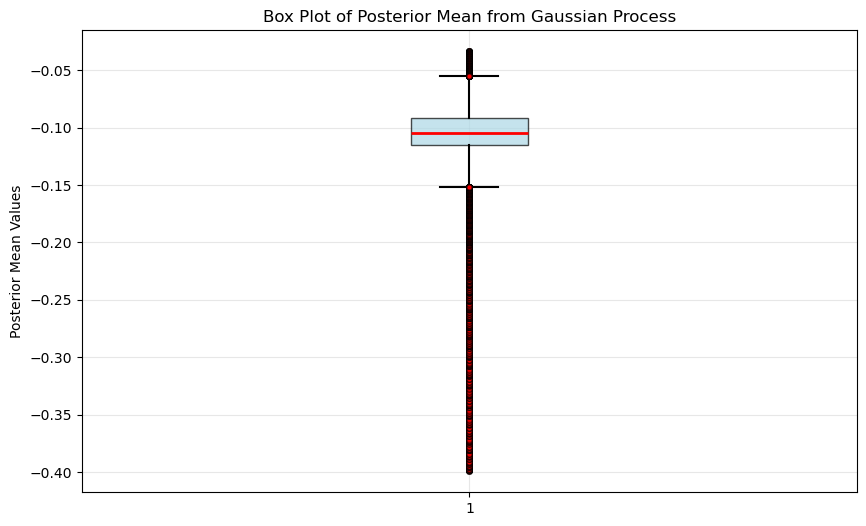

Posterior Mean Statistics:
Mean: -0.10895832326000067
Std: 0.037436990235592715
Min: -0.39911100856919146
Max: -0.03361159081703212
Range: 0.36549941775215933


In [21]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))

In [22]:

# Calculate the UCB aquisition function
kappa =  1 
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_3 = np.argmax(UCB)  
next_point_3 = x_3_grid[max_idx_3] 
print("Best known point:", x_3[np.argmax(y_3)])
print("Next query point:", round(next_point_3[0], 6), round(next_point_3[1], 6), round(next_point_3[2], 6))


Best known point: [0.49258141 0.61159319 0.34017639]
Next query point: 0.323232 0.282828 0.454545


## Function 4

**Change:** Normalised the output by setting `normalize_y=True` in `GaussianProcessRegressor()`. I then adjusted $\kappa$ in UCB accordingly. 

In [23]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 2.5

# set up evaluation grid:
x_41 = np.linspace(0, 1, 50)
x_42 = np.linspace(0, 1, 50)
x_43 = np.linspace(0, 1, 50)
x_44 = np.linspace(0, 1, 50)
x_41, x_42, x_43, x_44 = np.meshgrid(x_41, x_42, x_43, x_44)
x_4_grid = np.column_stack([x_41.ravel(), x_42.ravel(), x_43.ravel(), x_44.ravel()])

# Define and fit GP
kernel = Matern(length_scale=length_scale, nu=2.5)
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True) 
model.fit(np.array(x_4), np.array(y_4))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_4_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))



average posterior mean: -17.09942229577598
average posterior standard deviation: 2.2191900967323


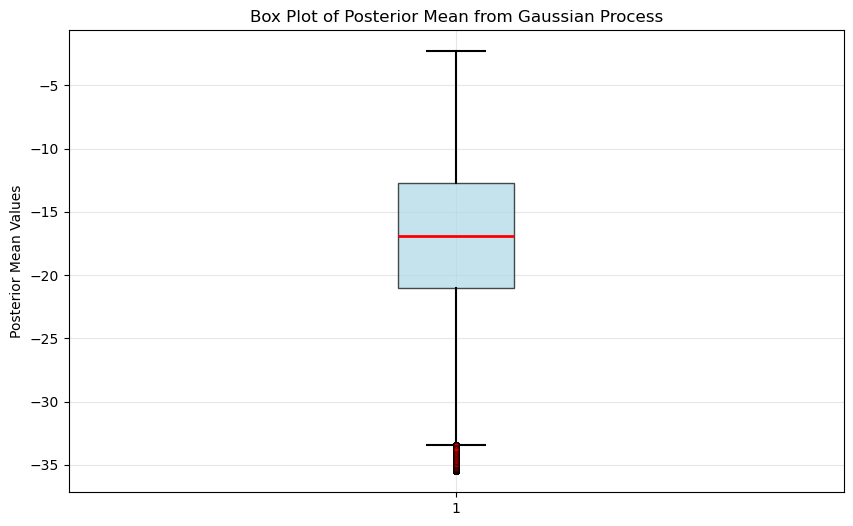

Posterior Mean Statistics:
Mean: -17.099422295775963
Std: 5.949786408849586
Min: -35.51052529177588
Max: -2.3027632298739107
Range: 33.20776206190197


In [24]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))

In [25]:

# Calculate the UCB aquisition function
kappa = 3 # choose this by looking at the mean post_mean and post_std to get an idea of the scale of each
UCB = post_mean + kappa * post_std


# Get the next query point
max_idx_4 = np.argmax(UCB)  
next_point_4 = x_4_grid[max_idx_4] 
print("Best known point:", x_4[np.argmax(y_4)])
print("Next query point:", round(next_point_4[0], 6), round(next_point_4[1], 6), round(next_point_4[2], 6), round(next_point_4[3], 6))


Best known point: [0.510204 0.489796 0.387755 0.408163]
Next query point: 0.346939 0.408163 0.469388 0.428571


## Function 5

**Change:** 
- Normalised the output by setting `normalize_y=True` in `GaussianProcessRegressor()`. I then adjusted $\kappa$ in UCB accordingly. 

In [26]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1

# set up evaluation grid:
x_51 = np.linspace(0, 1, 50)
x_52 = np.linspace(0, 1, 50)
x_53 = np.linspace(0, 1, 50)
x_54 = np.linspace(0, 1, 50)
x_51, x_52, x_53, x_54 = np.meshgrid(x_51, x_52, x_53, x_54)
x_5_grid = np.column_stack([x_51.ravel(), x_52.ravel(), x_53.ravel(), x_54.ravel()])

# Define and fit GP
kernel = RBF(length_scale = length_scale) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True) 
model.fit(np.array(x_5), np.array(y_5))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_5_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))




average posterior mean: 193.0263479417749
average posterior standard deviation: 304.46575036948195


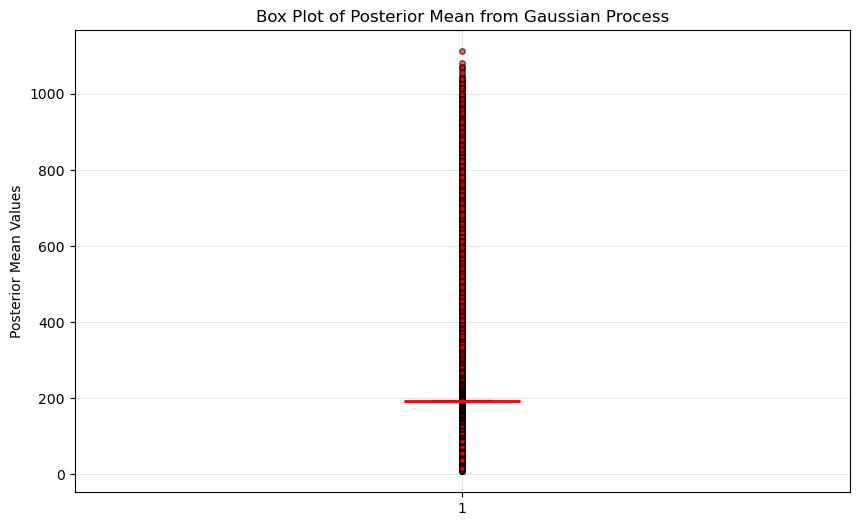

Posterior Mean Statistics:
Mean: 193.02634794177493
Std: 11.528152603936865
Min: 7.7434235974618275
Max: 1112.1374104102954
Range: 1104.3939868128336


In [27]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


In [28]:
# Calculate the UCB aquisition function
kappa = 1 
UCB = post_mean + kappa * post_std


# Get the next query point
max_idx_5 = np.argmax(UCB)  
next_point_5 = x_5_grid[max_idx_5] 
print("Best known point:", x_5[np.argmax(y_5)])
print("Next query point:", round(next_point_5[0], 6), round(next_point_5[1], 6), round(next_point_5[2], 6), round(next_point_5[3], 6))

Best known point: [0.22418902 0.84648049 0.87948418 0.87851568]
Next query point: 0.22449 0.857143 0.897959 0.877551


## Function 6:

**Change:** 
- Normalised the output by setting `normalize_y=True` in `GaussianProcessRegressor()`. 
- used UCD instead of PI 

In [68]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1

# set up evaluation grid:
x_61 = np.linspace(0, 1, 30)
x_62 = np.linspace(0, 1, 30)
x_63 = np.linspace(0, 1, 30)
x_64 = np.linspace(0, 1, 30)
x_65 = np.linspace(0, 1, 30)
x_61, x_62, x_63, x_64, x_65 = np.meshgrid(x_61, x_62, x_63, x_64, x_65)
x_6_grid = np.column_stack([x_61.ravel(), x_62.ravel(), x_63.ravel(), x_64.ravel(), x_65.ravel()])

# Define and fit GP
kernel = RBF(length_scale = length_scale) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True) 
model.fit(np.array(x_6), np.array(y_6))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_6_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

average posterior mean: -1.4460080808414943
average posterior standard deviation: 0.28595135685893375


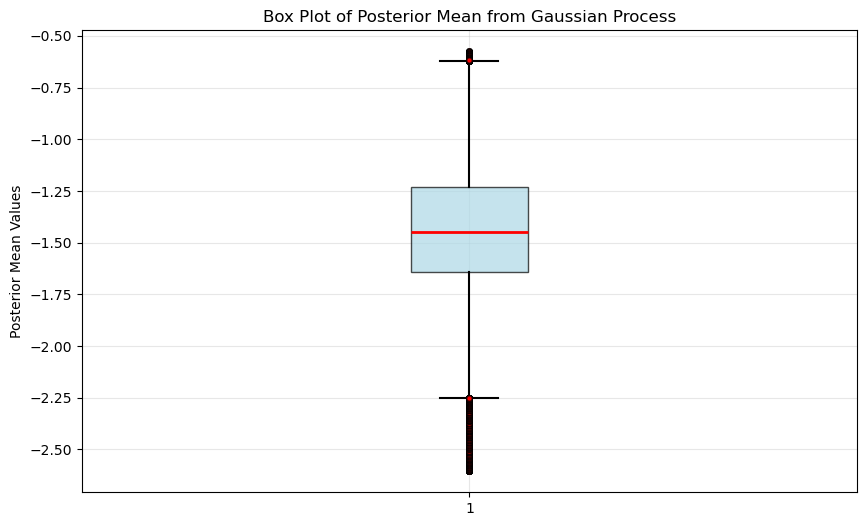

Posterior Mean Statistics:
Mean: -1.4460080808414923
Std: 0.3167078721654854
Min: -2.6056417840881214
Max: -0.5743928028369797
Range: 2.031248981251142


In [69]:
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


In [70]:
# Calculate the UCB aquisition function
kappa = 1
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_6 = np.argmax(UCB)  
next_point_6 = x_6_grid[max_idx_6] 
print("Best known point:", x_6[np.argmax(y_6)])
print("Next query point:", round(next_point_6[0], 6), round(next_point_6[1], 6), round(next_point_6[2], 6), round(next_point_6[3], 6), round(next_point_6[4], 6))

Best known point: [0.517241 0.413793 0.275862 0.827586 0.241379]
Next query point: 0.482759 0.344828 0.551724 0.655172 0.137931


## Function 7

**Change:** 
- Normalised the output by setting `normalize_y=True` in `GaussianProcessRegressor()`. I then adjusted $\kappa$ in UCB accordingly. 

In [32]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 1.5

# set up evaluation grid:
x_71 = np.linspace(0, 1, 15)
x_72 = np.linspace(0, 1, 15)
x_73 = np.linspace(0, 1, 15)
x_74 = np.linspace(0, 1, 15)
x_75 = np.linspace(0, 1, 15)
x_76 = np.linspace(0, 1, 15)
x_71, x_72, x_73, x_74, x_75, x_76 = np.meshgrid(x_71, x_72, x_73, x_74, x_75, x_76)
x_7_grid = np.column_stack([x_71.ravel(), x_72.ravel(), x_73.ravel(), x_74.ravel(), x_75.ravel(), x_76.ravel()])

# Define and fit GP
kernel = Matern(length_scale=length_scale, nu=nu) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True) 
model.fit(np.array(x_7), np.array(y_7))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_7_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

average posterior mean: 0.25163813420239195
average posterior standard deviation: 0.2999540095106297


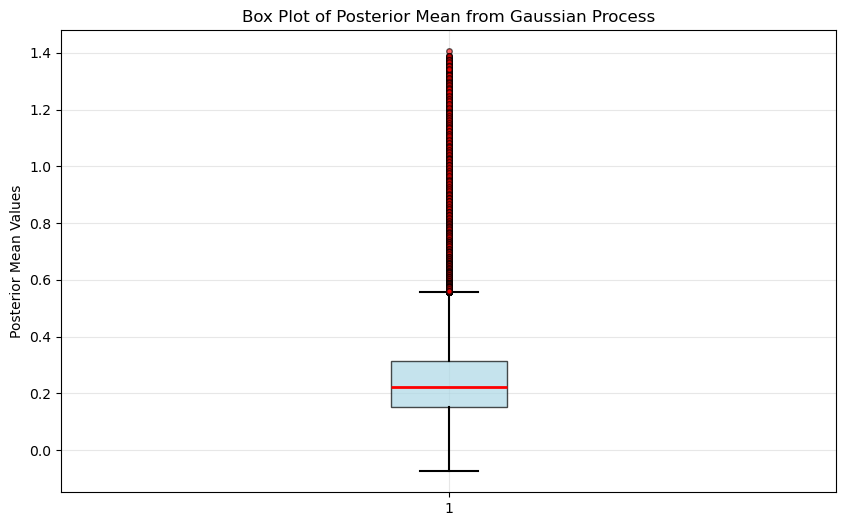

Posterior Mean Statistics:
Mean: 0.25163813420239173
Std: 0.14919162170703915
Min: -0.07442113319212995
Max: 1.4051677406582956
Range: 1.4795888738504255


In [33]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


In [34]:
# Calculate the UCB aquisition function
kappa = 1
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_7 = np.argmax(UCB)  
next_point_7 = x_7_grid[max_idx_7] 
print("Best known point:", x_7[np.argmax(y_7)])
print("Next query point:", round(next_point_7[0], 6), round(next_point_7[1], 6), round(next_point_7[2], 6), round(next_point_7[3], 6), round(next_point_7[4], 6), round(next_point_7[5], 6))

Best known point: [0.       0.428571 0.285714 0.142857 0.357143 0.785714]
Next query point: 0.0 0.5 0.285714 0.142857 0.357143 0.714286


## Function 8

**Change:** 
- Normalised the output by setting `normalize_y=True` in `GaussianProcessRegressor()`. 
- made $\kappa$ higher

In [55]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 1.5

# set up evaluation grid:
x_81 = np.linspace(0, 1, 5)
x_82 = np.linspace(0, 1, 5)
x_83 = np.linspace(0, 1, 5)
x_84 = np.linspace(0, 1, 5)
x_85 = np.linspace(0, 1, 5)
x_86 = np.linspace(0, 1, 5)
x_87 = np.linspace(0, 1, 5)
x_88 = np.linspace(0, 1, 5)
x_81, x_82, x_83, x_84, x_85, x_86, x_87, x_88 = np.meshgrid(x_81, x_82, x_83, x_84, x_85, x_86, x_87, x_88)
x_8_grid = np.column_stack([x_81.ravel(), x_82.ravel(), x_83.ravel(), x_84.ravel(), x_85.ravel(), x_86.ravel(), x_87.ravel(), x_88.ravel()])

# Define and fit GP
kernel = Matern(length_scale=length_scale, nu=nu) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption, normalize_y=True) 
model.fit(np.array(x_8), np.array(y_8))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_8_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))


average posterior mean: 7.818085064872485
average posterior standard deviation: 0.41127251683499855


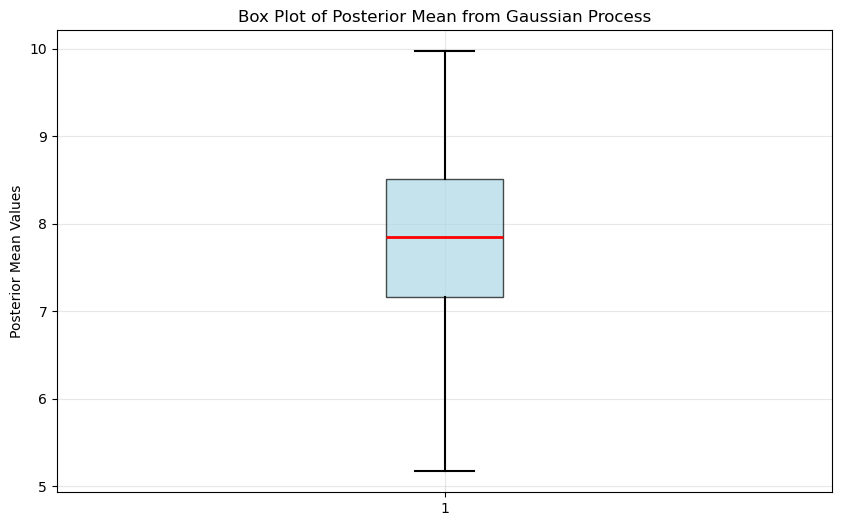

Posterior Mean Statistics:
Mean: 7.818085064872487
Std: 0.9088940346315035
Min: 5.172523668690862
Max: 9.972882651110556
Range: 4.800358982419694


In [56]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


In [59]:
# Calculate the UCB aquisition function
kappa = 1
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_8 = np.argmax(UCB)  
next_point_8 = x_8_grid[max_idx_8] 
print("Best known point:", x_8[np.argmax(y_8)])
print("Next query point:", round(next_point_8[0], 6), round(next_point_8[1], 6), round(next_point_8[2], 6), round(next_point_8[3], 6), round(next_point_8[4], 6), round(next_point_8[5], 6), round(next_point_8[6], 6), round(next_point_8[7], 6))


Best known point: [0.25 0.25 0.   0.25 0.5  0.5  0.25 0.5 ]
Next query point: 0.0 0.25 0.0 0.25 0.75 0.5 0.0 0.75
